# Imports

In [1]:
# Imports
from cvm.cvmgen import InverseTransform
from cvm.cvmgen import Weibull
from cvm.cvmgen import Pareto
from cvm.cvmgen import Erlang
from cvm.cvmgen import CompositionMethod
from cvm.cvmgen import Exponential
from cvm.cvmgen import Generator
from cvm.cvmgen import RejectionMethod
from cvm.normal import Normal
from cvm.normal import NormalPolar
from cvm.cauchy import Cauchy
from cvm.poissonp import PoissonProcess

from utilities.efficency import runTimeCalc
from utilities.efficency import plotExTimes

import math
from utilities.distPlot import plot
import numpy as np
from random import random 

## Ex 1

### a
We will make a inverse transform generator. For that, first we have to find the cumulative distribution function.  
We say a random variable is continuous if and only if exists a funcion f such that for every subset C 
$$ P(X \in C) = \int_{C} f(x)dx $$
If the variable is continuous, its cumulative distribution function is:
$$ F(a) = P(X \leq a) = \int_{- \infty}^{a} f(x)dx $$


$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{x-2}{2} & if & 2 \leq x \leq 3 \\
             \\ \cfrac{2-x/3}{2} & if & 3 \leq x \leq 6 \\
             \\ 0 & otherwise
             \end{array}
   \right.
$



If $ 2 \leq x \leq 3 $:

$$
F(X \leq x) = \int_{2}^{x} \cfrac{y-2}{2}dy = \cfrac{x^{2}}{4} -x + 1
$$



If $ 3 \leq x \leq 6 $:

$$
F(X \leq x) = \int_{2}^{3} \cfrac{y-2}{2}dy + \int_{3}^{x} \cfrac{2-y/3}{2}dy =-\cfrac{x^{2}}{12} + x - 2
$$



Summing up




$
F(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 2 \\
             \cfrac{x^{2}}{4} -x + 1 & if & 2 \leq x \leq 3 
             \\ -\cfrac{x^{2}}{12} + x - 2 & if & 3 \leq x \leq 6 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$

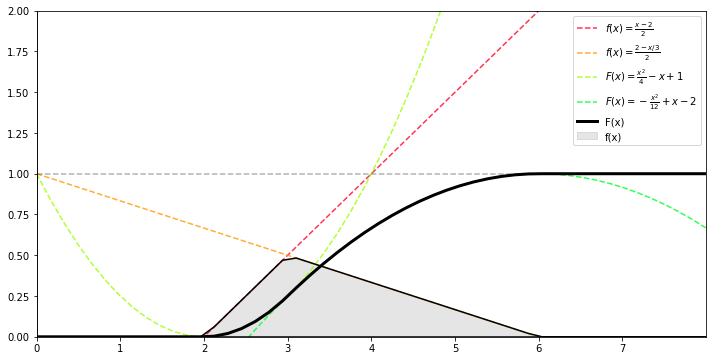

In [2]:
labels = [
    r'$f(x)= \frac{x-2}{2}$',
    r'$f(x)= \frac{2-x/3}{2}$',
    r'$F(x)= \frac{x^{2}}{4} -x + 1$',
    r'$F(x)= - \frac{x^{2}}{12} + x - 2$'
          ]
# This is just to give something to conds. Really dirty 
x = np.linspace(0,8)

# The probability density functions
pdf = [0,
         lambda x: (x-2)/2,
         lambda x: (2-x/3)/2,
         0]

# Conditions for each of the pieces
conds = [x<2,
        (x>2) & (x<3),
        (x>3) & (x<6)]

# Cumulative distribution functions
cdf = [0,
       lambda x: (x**2)/4-x+1,
       lambda x: -(x**2)/12+x-2,
       1]

x_lim = (0,8)
y_lim = (0,2)
fun_plot = plot(pdf,x_lim,y_lim,labels,cdf,conds)


Now we can make our inverse transform generator as it follows:
```
def inverseTransform(y):
    u = random()
    if u < F(2):
        return inverseF(u)
    if u < F(3):
        return inverseF(u)
    else:
        return inverseF(u)
```

So for the inverse transform generator we need the inverse of our cummulative function:

$$
F^{-1}(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 2 \\
             2 \pm 2\sqrt{x} & if & 2 \leq x \leq 3 
             \\ 6 \pm 2\sqrt{3}\sqrt{1-x} & if & 3 \leq x \leq 6 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$$

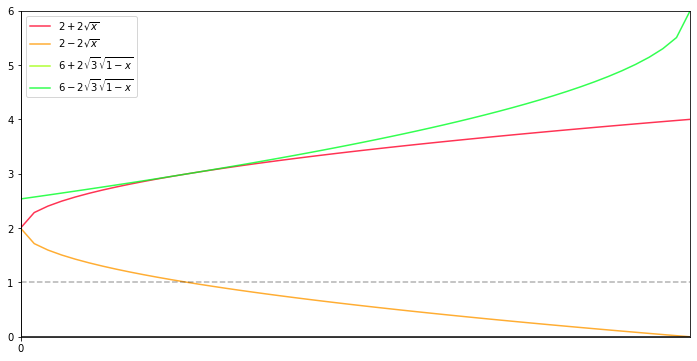

In [3]:
from math import sqrt
labels = [r'$2 + 2\sqrt{x}$',
          r'$2 - 2\sqrt{x}$',
          r'$6 + 2\sqrt{3}\sqrt{1-x}$',
          r'$6 - 2\sqrt{3}\sqrt{1-x}$']

funcs = [lambda x: 2+2*np.sqrt(x),
         lambda x: 2-2*np.sqrt(x),
         lambda x: 6+2*np.sqrt(3)*np.sqrt(1-x),
         lambda x: 6-2*np.sqrt(3)*np.sqrt(1-x) 
        ]
x_lim = (0,1)
y_lim = (0,6)
plot(funcs,x_lim,y_lim,labels,dist=False,ls='-')

We can observe that the only functions that fullfill our requirements: domain in (0,1) and image in (2,3) and (3,6) respectively are $ f(x) = 2 + 2\sqrt{x}$ and $ f(x) = 6-2\sqrt{3}\sqrt{1-x}$
so those are the ones we will use in our generator.

$$
F^{-1}(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 2 \\
             2 + 2\sqrt{x} & if & 2 \leq x \leq 3 
             \\ 6 - 2\sqrt{3}\sqrt{1-x} & if & 3 \leq x \leq 6 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$$


In [4]:
# Probability distribution functions
pdf = [0,
         lambda x: (x-2)/2,
         lambda x: (2-x/3)/2,
         0]

# Linear space where we the conditions are applied
x = np.linspace(0,8)
conds = [x<2,
        (x>2) & (x<3),
        (x>3) & (x<6)]

cdfInverse = [lambda x: 2+2*np.sqrt(x),
              lambda x: 6-2*np.sqrt(3)*np.sqrt(1-x)]

# Limit values of the piece-wise function
lims = [3,6]

# Cummulative distribution applied to each of the limits
# in lims
cdf = [lambda x: (x**2)/4-x+1,
          lambda x: -(x**2)/12+x-2]


exAgen = InverseTransform(cdfInverse,limits=lims,cdf=cdf,pdf=pdf,conds=conds)

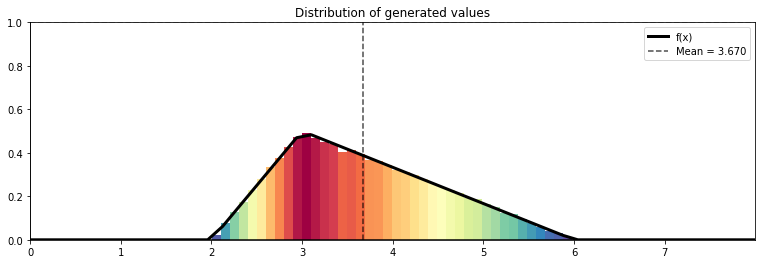

In [5]:
exAgen.plot(100000,figsize=(13,4),bins=40)

In [6]:
exAgen.limits

[0.25, 1.0]

### b

$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{6(x+3)}{35} & if & 0 \leq x \leq 1 \\
             \\ \cfrac{6x^{2}}{35} & if & 1 \leq x \leq 2 \\
             \\ 0 & otherwise
             \end{array}
   \right.
$


$
F(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 0 \\
             \cfrac{3x^{2}+18}{35} & if & 0 \leq x \leq 1 
             \\ \cfrac{6}{10}+\cfrac{2x^{3}-2}{35} & if & 1 \leq x \leq 2 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$


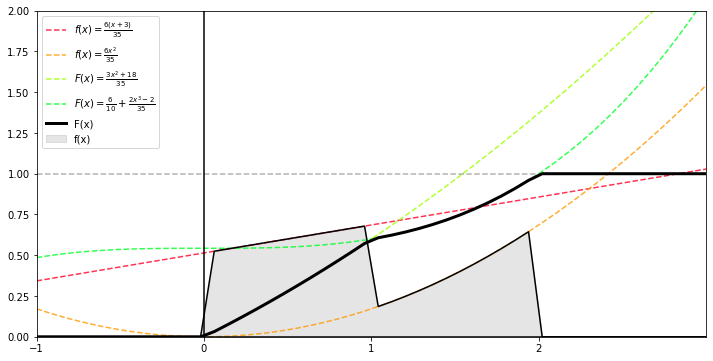

In [7]:
from utilities.distPlot import plot
import numpy as np
labels = [
    r'$f(x)= \frac{6(x+3)}{35}$',
    r'$f(x)= \frac{6x^{2}}{35}$',
    r'$F(x)= \frac{3x^{2}+18}{35}$',
    r'$F(x)= \frac{6}{10}+\frac{2x^{3}-2}{35}$'
          ]

# This is the linear space in which the conditions are applied 
x_lim = (-1,3)
y_lim = (0,2)

x = np.linspace(x_lim[0],x_lim[1])

pdf = [0,
       lambda x: (6*(x+3))/35,
       lambda x: (6*(x**2))/35,
       0]

conds = [x<=0,
        (x>0) & (x<=1),
        (x>1) & (x<2)]

cdf = [0,
       lambda x: (6/35)*((x**2)/2+x*3),
       lambda x: (6/10)+(2/35)*((x**3)-1),
       1]

fun_plot = plot(pdf,x_lim,y_lim,labels,cdf,conds)


We can see that the function is consistent with the hypothesis needed to apply the 
inverse transform method so we will use it again.
Now we calculate the inverse function of the cumulative probability function.

<ipython-input-8-3ef0164d31a8>:8: RuntimeWarning: invalid value encountered in sqrt
  cdfInverseCandidates = [lambda x: -3 + np.sqrt(35*x+27)/np.sqrt(3),
<ipython-input-8-3ef0164d31a8>:9: RuntimeWarning: invalid value encountered in sqrt
  lambda x: -3 - np.sqrt(35*x+27)/np.sqrt(3),


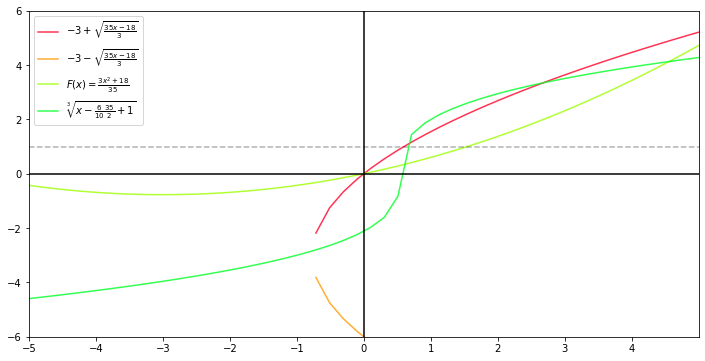

In [8]:
from math import sqrt
labels = [r'$-3 + \sqrt{\frac{35x-18}{3}}$',
          r'$-3 - \sqrt{\frac{35x-18}{3}}$',
          r'$F(x)= \frac{3x^{2}+18}{35}$',
          r'$\sqrt[3]{x-\frac{6}{10}\frac{35}{2}+1}$',
          ]

cdfInverseCandidates = [lambda x: -3 + np.sqrt(35*x+27)/np.sqrt(3),
                        lambda x: -3 - np.sqrt(35*x+27)/np.sqrt(3),
                        lambda x: (6/35)*((x**2)/2+x*3),
                        lambda x: np.cbrt((35*x-19)/2)]
x_lim = (-5,5)
y_lim = (-6,6)
plot(cdfInverseCandidates,x_lim,y_lim,labels,dist=False,ls='-')

$
F^{-1}(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 0 \\
             -3 + \sqrt{\frac{35x+27}{3}} & if & 0 \leq x \leq 1 
             \\ \sqrt[3]{x-\frac{6}{10}\frac{35}{2}+1} & if & 1 \leq x \leq 2 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$


In [9]:
lims = [1,2]


cdfInverse = [lambda x: -3 + np.sqrt(35*x+27)/np.sqrt(3),
              lambda x: np.cbrt((35*x-19)/2)]
cdf = [lambda x: (6/35)*((x**2)/2+x*3),
       lambda x: (6/10)+(2/35)*((x**3)-1)]

exBgen = InverseTransform(cdfInverse,limits=lims,cdf=cdf,pdf=pdf,conds=conds,x_lim=(-1,3))

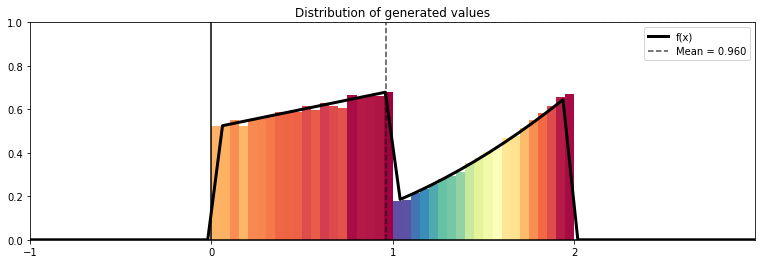

In [10]:
exBgen.plot(100000,figsize=(13,4),bins=40)

### c

$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{exp(4x)}{4} & if &  - \infty < x \leq 0 \\
             \\ \cfrac{1}{4} & if & 0 \leq x \leq \cfrac{15}{4} \\
             \\ 0 & otherwise
             \end{array}
   \right.
$


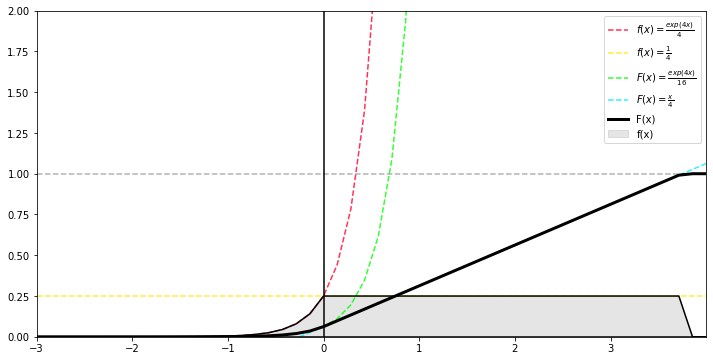

In [11]:
from math import exp
labels = [
    r'$f(x)= \frac{exp(4x)}{4}$',
    r'$f(x)= \frac{1}{4}$',
    r'$F(x)= \frac{exp(4x)}{16}$',
    r'$F(x)= \frac{x}{4}$'
          ]

# This is the linear space in which the conditions are applied 
x_lim = (-3,4)
y_lim = (0,2)

x = np.linspace(x_lim[0],x_lim[1])

pdf = [lambda x: np.exp(4*x)/4,
       lambda x: (0*x)+1/4,
       0]

conds = [x<0,
        (x>=0) & (x<=15/4),
        (x>15/4)]

cdf = [lambda x: np.exp(4*x)/16,
       lambda x: x/4 + 1/16,
       1]

fun_plot = plot(pdf,x_lim,y_lim,labels,cdf,conds)


The hyphotesis are fullfilled. So we are going to use the inverse method again

In [12]:
lims = [0,15/4]


cdfInverse = [lambda x: (1/4)*np.log(16*x),
              lambda x: (1/4)*(16*x-1)]

cdf = [lambda x: np.exp(4*x)/16,
       lambda x: x/4 + 1/16]

exCgen = InverseTransform(cdfInverse,lims,cdf=cdf,pdf=pdf,conds=conds,x_lim=(-3,4))

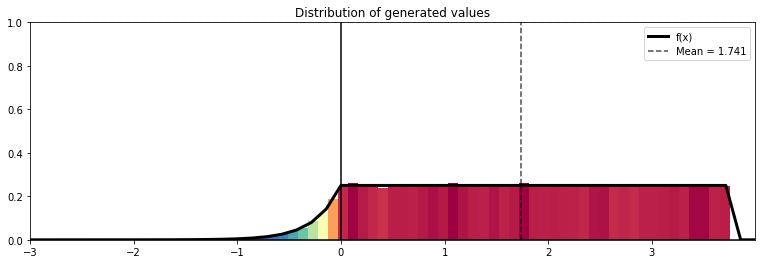

In [13]:
exCgen.plot(100000,figsize=(13,4),bins=60)

## Ex 2

### Pareto Distribution
Design a method to generate random variables Pareto distributed:
$$
f(x)= ax^{-(a+1)}    1 < x < \infty, a > 0
$$

$$
F(x)= 1-s^{-a}
$$

In [14]:
import numpy as np
from cvm.cvmgen import Pareto
from utilities.distPlot import plot

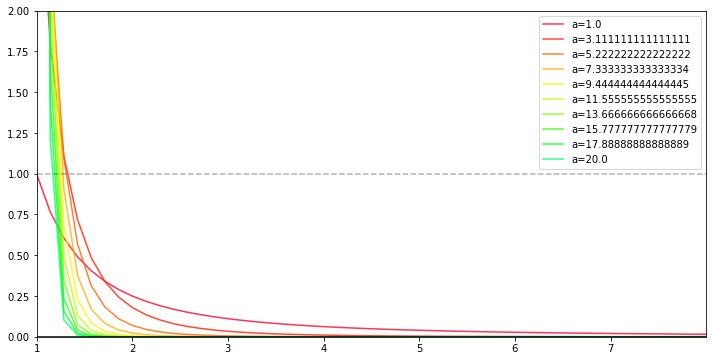

In [15]:
n = 3
x_lim = (1,8)
y_lim = (0,2)
paretos = [Pareto(i).pdf[1] for i in np.linspace(1,20,10)]
labels = [r'a={}'.format(i) for i in np.linspace(1,20,10)]
plot(paretos,x_lim,y_lim,labels,dist=False,ls='-')

In [16]:
pareto = Pareto(2)

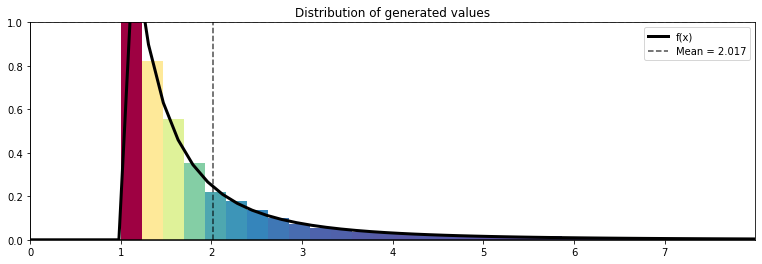

In [17]:
pareto.plot(10000,figsize=(13,4),bins=700)

The mean of a Pareto random variable is
$$
E(X) = \cfrac{\alpha x_{m}}{\alpha-1}
$$

$ \varphi $

In [18]:
pareto.mean

2.01671879374397

### Weibull
$$
f(x) = \cfrac{\beta}{\lambda} \cfrac{x}{\lambda}^{\beta - 1} exp(-(x/\lambda))^{\beta})
$$
$$
0 \leq x , \lambda > 0,  \beta > 0 
$$

$$
F(x) = 1 - e^{-(x/\lambda)^{k}}
$$

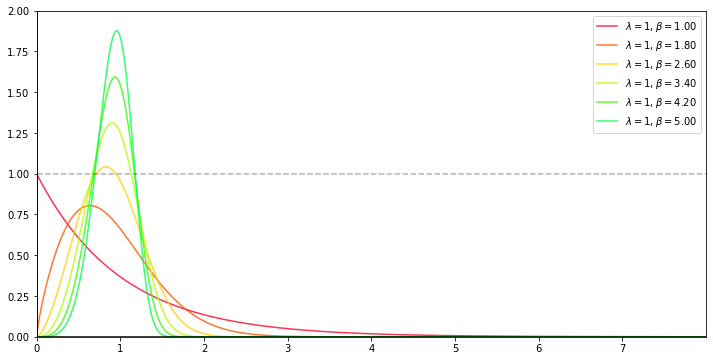

In [19]:
x_lim = (0,8)
y_lim = (0,2)
paretos = [Weibull(1,i,x_lim).pdf[1] for i in np.linspace(1,5,6)]
labels = [r'$\lambda = 1, \beta={:.2f}$'.format(i) for i in np.linspace(1,5,6)]
plot(paretos,x_lim,y_lim,labels,dist=False,ls='-',npoints=300)

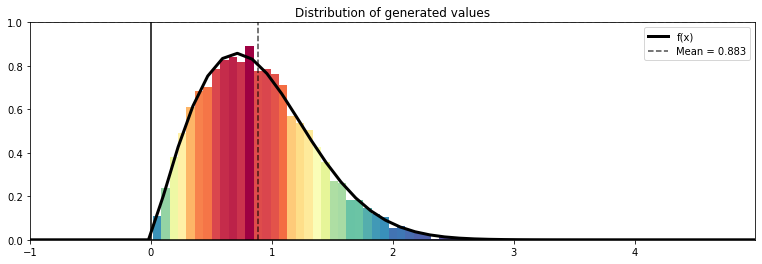

In [21]:
weibull = Weibull(1,2,x_lim=(-1,5))
weibull.plot(10000,figsize=(13,4),bins=50)

The mean of a Weibull variable is
$$
E(X) = \lambda \Gamma (1 + \cfrac{1}{\beta})
$$

where 
$$
\Gamma(x) = \int_{0}^{\infty} t^{z-1} e^{-t}dt
$$  

*If $n \in \mathbb{N}, \Gamma(n) = (n-1)!$*   


*The $\Gamma$ function is an extension of the factorial to complex numbers. Cool huh?*

With $\lambda = 1 , \beta = 2$ our expected mean is:  
$$
E(X) = 1 * \Gamma (3/2) = 0.88
$$

In [22]:
weibull.mean

0.8828745473692748

### Erlang Distribution
$$
f(x) = \cfrac{x^{k-1}exp(-x/\mu)}{(k-1)!\mu^{k}}
$$

$\mu > 0, k \in \mathbb{Z}, x > 0$
Where $k$ is the *shape*, $\mu$ the "scale". Sometimes the reciprocal of the scale, the $\lambda$ "rate" is used. 


First, note that Erlang distribution is from the Gamma family.

$$
\Gamma(x,\alpha,\beta)= \cfrac{1}{\Gamma(\alpha)}\beta^{-\alpha}x^{\alpha-1}e^{-\frac{x}{\beta}}
$$

It's basically a $\Gamma(k,\mu)$  
The mean of an Erlang distribution $E(X) = k \mu = \cfrac{k}{\lambda} $

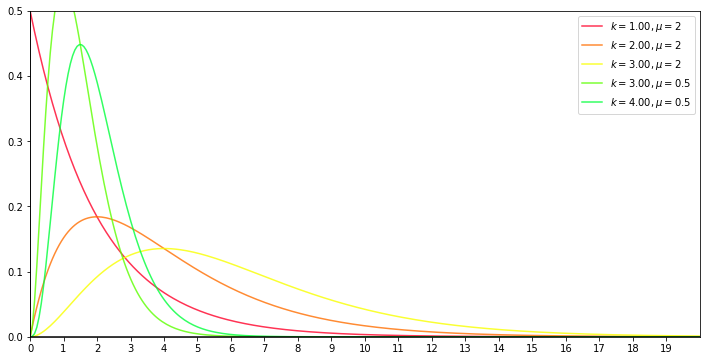

In [23]:
x_lim = (0,20)
y_lim = (0,0.5)
erlangs = [Erlang(i,2,x_lim).pdf[1] for i in range(1,4)] + [Erlang(i,1/2,x_lim).pdf[1] for i in range(3,5)]
labels = [r'$k = {:.2f}, \mu=2$'.format(i) for i in range(1,4)] + [r'$k = {:.2f}, \mu=0.5$'.format(i) for i in range(3,5)]
plot(erlangs,x_lim,y_lim,labels,dist=False,ls='-',npoints=300)

In [24]:
erlang = Erlang(k=2,mu=2,x_lim=(0,20),y_lim=(0,0.5))

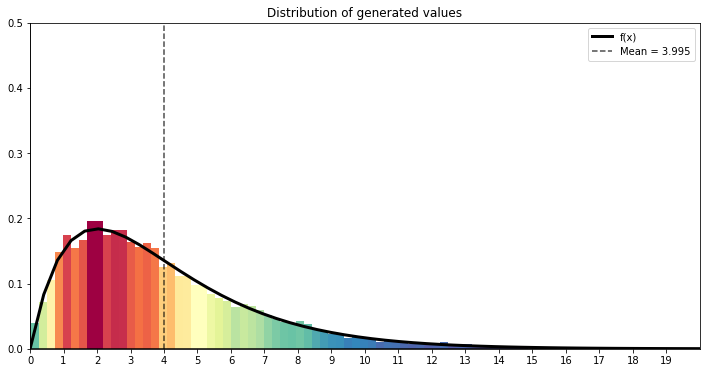

In [25]:
erlang.plot(10000,bins = 100)

## Ex 3


Asuming its relatively easy to generate n random variables with probability distribution $F_{i}, i = 1,...,n$. Develop a method to generate a random variable distributed:
$$
F(x) = \sum_{i=1}^n p_{i}F_{i}(x)
$$
where $p_{i},i=1,...,n$ are non negative numbers that sum 1

The algorithm is:
```
assuming the weights are sorted
u = random()
if u < p1:
    generate F1()
elif u < p2:
    generate F2()
    .
    .
    .
if u < pn:
    generate FN()
```

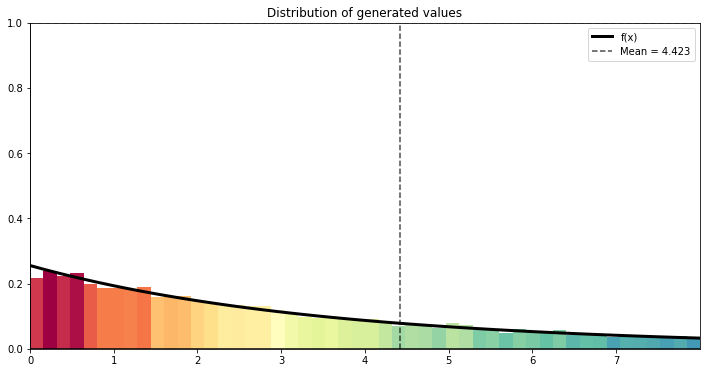

In [26]:
weights = [0.2,0.3,0.5]
generators = [Exponential(1/7),Exponential(1/5),Exponential(1/3)]
composition = CompositionMethod(generators,weights)
composition.plot(10000,bins=300)

In [27]:
0.2*7+0.3*5+0.5*3

4.4

## Ex 4

Develop a method to generate a random variable distributed:
$$
F(x) = \int_{0}^{\infty} x^{y} e^{-y}dy,   0\leq x \leq 1
$$
Suppose that the conditional distribution of X given Y is:  
$$
P(X \leq x | Y = y ) = x^{y}, 0\leq x \leq 1
$$

First note that $e^{-y} = \mathcal{E} (1)$ so $$\int_{0}^{\infty} e^{-y}dy = 1$$
and because the assuption:
$$
P(X\leq x) = \int_{-\infty}^\infty P(X\le x | Y=y) f_Y(y) dy
$$

Algorithm:

```
y = exp(1)
generate a random variable distributed x^y

```

We will generate the random variable using inverse transform method. 
$$F(x)= x^y$$
$$F^{-1}(x) = x^{1/y}$$ 


In [28]:
def ex4generator():
    y = Exponential(1).gen()
    return (random()**(1/y))

In [29]:
pdf = [0,lambda x: 1/(x*(1-np.log(x))**2)]
x = np.linspace(0,1)
conds = [x<0,(x>0) & (x<=1)]
ex4gen = Generator(pdf=pdf,conds=conds,generator=ex4generator,x_lim=(0,1),y_lim=(0,20))

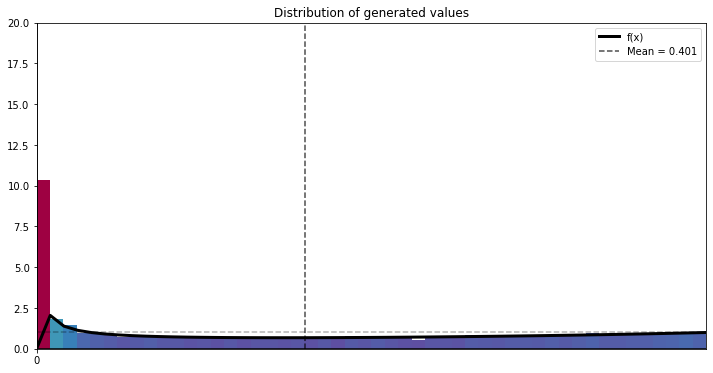

In [31]:
ex4gen.plot(10000,bins=50)

## Ex 5

Consider its easy to generate random variables distributed $F_{i}, i=1,...,n$. Explain how to generate
random variables distributed:
$$
i) F_{M}(x)= \prod_{i=1}^n F_{i}(x)
$$
$$
ii) F_{m}(x) = 1 - \prod_{i=1}^n 1 - F_{i}(x)
$$
  
Generate a sample of M and m considering Xi are independent exponentials with $\lambda = 1,2,3$ respectively

$i)$ First, note that given  
$$
X = Max_{i}(X_{1},...,X_{n})
$$
$$
P(X \leq x) = P(X_{1} \leq x )...P(X_{n} \leq x ) = \prod_{i=1}^n P(X_{i} \leq x)
$$
*(Because if we want the maximum of n variables to be less than x, then all of the variables must be less than x)*

So if $X = Max_{i}(X_{i})$ , $F_{M} = \prod_{i=1}^n F_{i}(x)$ and the algorithm is:
```
def fM()
    generate x1,...,xn random variables with cdf F1,...,Fn
    return max(x1,...,xn)
```

$ii)$
Given 
$$
X = Min_{i}(X_{1},...,X_{n})
$$
$$
P(X \leq x) = 1 - P(X_{1} > x )...P(X_{n} > x) = 1 - \prod_{i=1}^n P(X_{i} > x)
$$
*If we want the MINIMUM of n variables to be less than x, that is equivalent to asking that none of them is larger than x*
```
def fm()
    generate x1,...,xn
    return min(x1,...,xn)
```

In [32]:
def generateM():
    return max(Exponential(1).gen(),Exponential(2).gen(),Exponential(3).gen())

def generatem():
    return min(Exponential(1).gen(),Exponential(2).gen(),Exponential(3).gen())

In [33]:
def maxExp(y):
    y = (max(Exponential(1).pdf[1](y),Exponential(2).pdf[1](y),Exponential(3).pdf[1](y)))
    return y
pdf = [0,lambda y: maxExp(y)]
x = np.linspace(0,5)
conds = [x<0,x>=0]
maxGen = Generator(pdf=[0,0],conds=conds,generator=generateM,x_lim=(0,5))

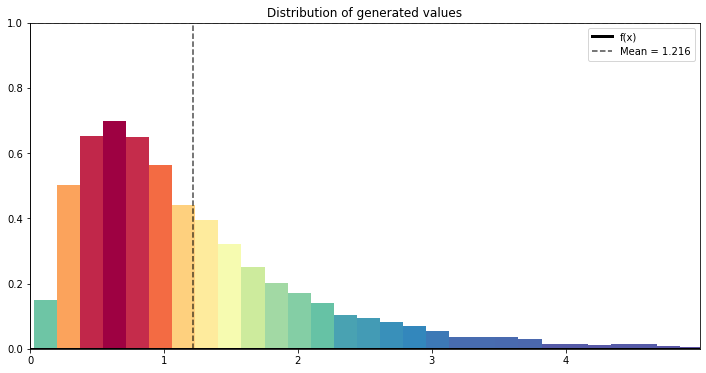

In [34]:
maxGen.plot(10000,bins=60)

In [35]:
pdf = [0,lambda x: 1 - (1-Exponential(1).cdf[1](x)) * (1-Exponential(2).cdf[1](x)) * (1-Exponential(3).cdf[1](x)) ]
#pdf = [0,lambda x: ]
x = np.linspace(0,8)
conds = [x<0,x>=0]
minGen = Generator(pdf=[0,0],conds=conds,generator=generatem,x_lim=(0,8),y_lim=(0,5))

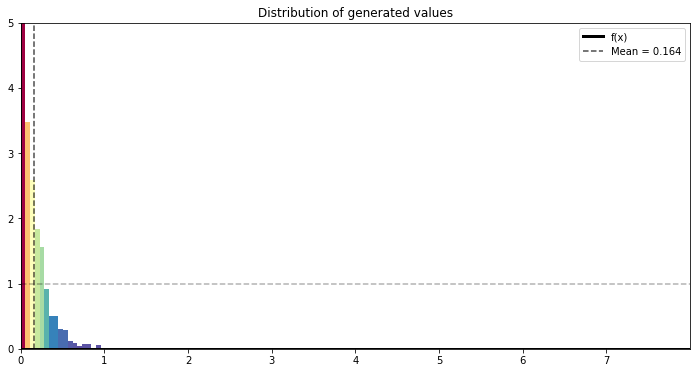

In [36]:
minGen.plot(1000)

## Ex 6

Based on the results of previous exercices, use the Rejection method to generate 2 different methods besides Inverse Transform to generate a random variable with probability distribution:
$$
F(x) = x^{n}, 0 \le x \le 1
$$
Compare the efficency of the 3 methods

### Inverse transform

In [4]:
n = 2
pdf = [0,lambda x: n*(x**(n-1))]
cdf = [lambda x: x**n]
x = np.linspace(0,1)
conds = [x<0,(x>=0) & (x<=1)]
inverse_cdf = [lambda x: x**(1/n)]
ex6itgen = InverseTransform(inverse_cdf,pdf=pdf,cdf=cdf,conds=conds,limits=[1],y_lim=(0,2))

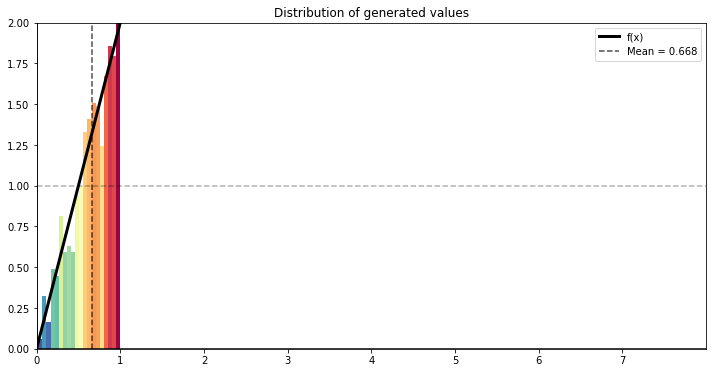

In [5]:
ex6itgen.plot(1000)

### Using previous ex. results
Note that:
$$
x^{n} = \prod_{i=0}^{n} x
$$
So we could generate x^n as the maximum of random variables evenly distributed in the interval $(0,1)$

In [6]:
def ex6gen():
    return max([random() for i in range(n)])
minGen = Generator(pdf=pdf,conds=conds,generator=ex6gen,y_lim=(0,2))

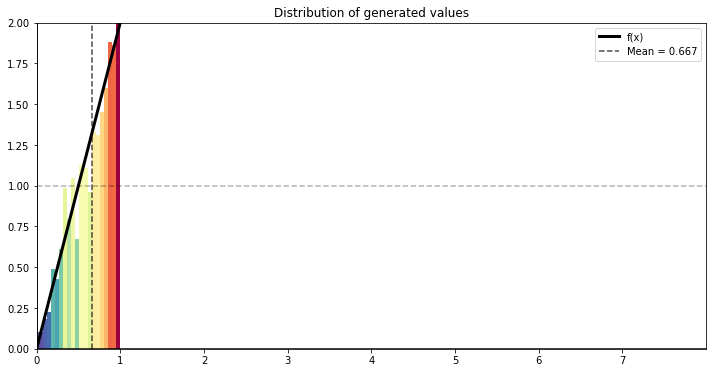

In [7]:
minGen.plot(1000)

### Using rejection method
To use the rejection method we need to define a support variable Y, that we know how to generate,
and a c such that $\cfrac{f(x)}{h(x)} \le c$
  
In this case we will use an even distribution as a support variable:  
$f_{X}(x) = (x^{n})' = nx^{n-1} , f_{Y}(x) = 1, x \in (0,1)$ and $h(x)=\cfrac{f_{X}(x)}{f_{Y}(x)} = f_{X}(x)$
and $c$ is the maximum of $nx^{n-1}, x\in (0,1)$, which is achieved when $x = 1,f_{X}(1)= 2 = c$


In [5]:
n=2
pdf_x = [0,lambda x: n*(x**(n-1))]
x = np.linspace(0,1)
conds = [x<0,(x>=0) & (x<=1)]
limits = [0,1]
pdf_y = (lambda x: 1)
gen_y = random
ex6rejgen = RejectionMethod(pdf_x,pdf_y,gen_y,c=2,limits=limits,conds=conds,y_lim=(0,2))

In [6]:
ex6rejgen.evaluate(0.2)

0.4

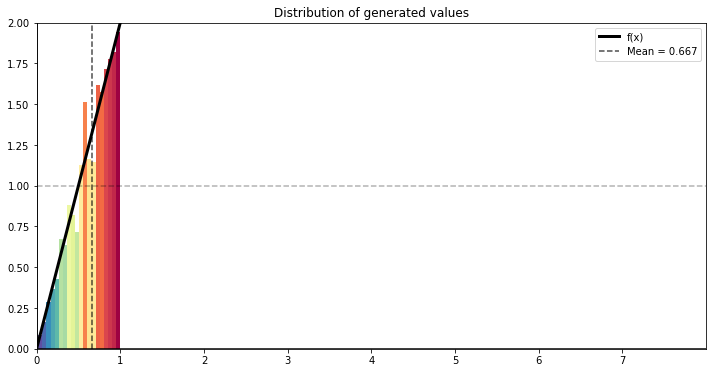

In [7]:
ex6rejgen.plot(1000)

## Ex 7

Develop Inverse Transform method an Rejection method to generate a random variable X with probability distribution:

$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{1}{x} & if &  1 <= x <= e \\
             \\ 0 & otherwise
             \end{array}
   \right.
$


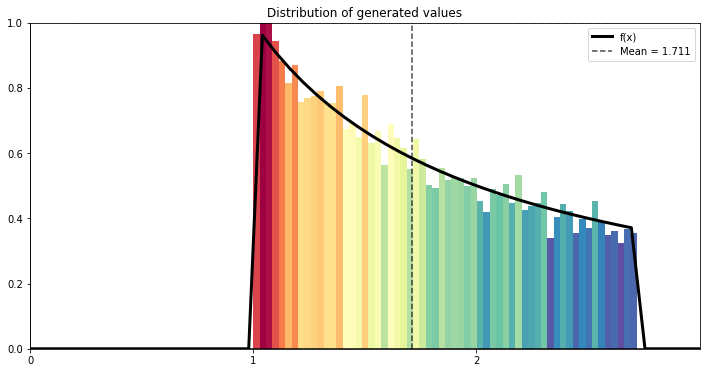

In [4]:
### Inverse transform
pdf = [0,lambda x: 1/x]
cdf = [lambda x: np.log(x)]
inverse_cdf = [lambda x: np.exp(x)]
limits = [math.e]
x = np.linspace(0,3)
conds = [x<1,(x>=1) & (x<=math.e)]
ex7it = InverseTransform(inverse_cdf,limits,pdf=pdf,cdf=cdf,conds=conds,x_lim=(0,3))
ex7it.plot(10000,bins=60)

We will use the rejection method with a random variable $ Y \sim U(1,e) $.  
$f_{Y}(x) = \cfrac{1}{e-1}$  
$h(x)=\cfrac{f_{X}(x)}{f_{Y}(x)}=\cfrac{e-1}{x} \leq c = 1-e, 1 \le x \le e$


/home/lucia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


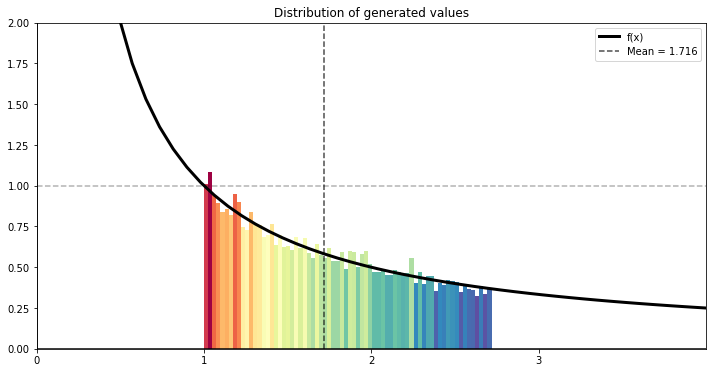

In [9]:
### Rejection method
pdf_x = [lambda x: 1/x]
limits = [math.e]
pdf_y = (lambda x: 1/(math.e-1))
gen_y = lambda: 1 + random()*(math.e-1)
ex7rejgen = RejectionMethod(pdf_x,pdf_y,gen_y,c=(math.e-1),limits=limits,piecewise=False,y_lim=(0,2),x_lim=(0,4))
ex7rejgen.plot(10000,bins=70)

## Ex 8

Let $U,V$ two independent uniformed random variables in $(0,1)$. Proof that $X=U+V$ has a *triangular* density:  


$$
f(x)= \left\{ \begin{array}{ll}
             x & if &  0 \le x < 1 \\
             \\ 2-x & if &  1 \le x < 2 \\
             \\ 0 & otherwise\\ 
             \end{array}
   \right.
$$


$f_{U}(x) = 1 = f_{V}(x)$
$$
f_{U+V}(x) = f_{U} * f_{V} (x) = \int_{0}^x 1 ds = x, 0 \leq x \leq 1 
$$
$$
f_{U+V}(x) = f_{U} * f_{V} (x) = \int_{0}^1 1 ds + \int_{1}^x 1 ds = 1 + 1 - x = 2 - x , 1 \leq x \leq 2 
$$ 

In [30]:
pdf = [lambda x: x,lambda x: 2-x,0]
x = np.linspace(0,2)
conds = [(0 <= x) & (x<1), (x>=1) & (x<=2)]

### Using the property that it is the sum of 2 uniforms:


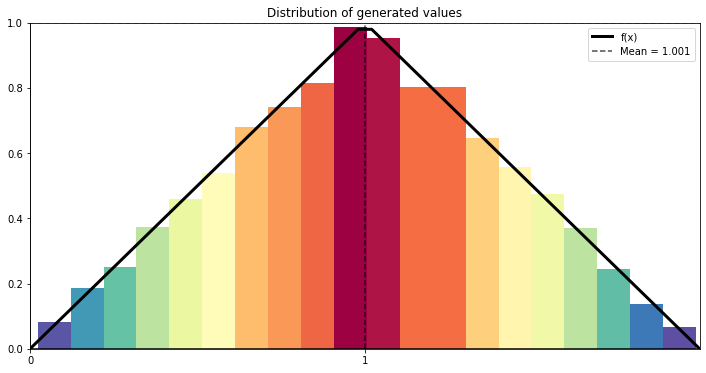

In [31]:
def genUV():
    return random()+random()
ex8rgen = Generator(generator=genUV,pdf=pdf,x_lim=(0,2),conds=conds)
ex8rgen.plot(10000)

### Inverse transform

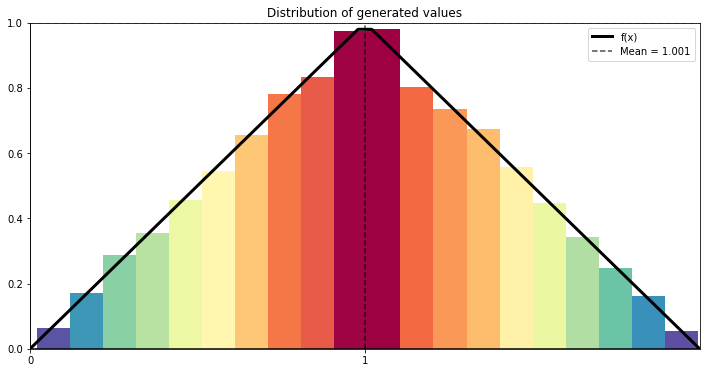

In [32]:
cdf = [lambda x: (x**2)/2,lambda x: 1/2 + 1/2*(-x**2+4*x-3)]
cdf_inverse = [lambda x:np.sqrt(2)*np.sqrt(x),lambda x:2-np.sqrt(2)*np.sqrt(1-x)]
limits = [1,2]
ex8itgen = InverseTransform(cdf_inverse,limits,pdf=pdf,cdf=cdf,conds=conds,x_lim=(0,2))
ex8itgen.plot(10000)

### Rejection method
We will use the rejection method with a random variable $ Y \sim U(0,2) $.  
$f_{Y}(x) = 1$  
$h1(x)=\cfrac{f_{X}(x)}{f_{Y}(x)}= x \leq c = 1, 0 \le x \le 1$
$h1(x)=\cfrac{f_{X}(x)}{f_{Y}(x)}= 2-x \leq c = 1, 1 \le x \le 2$


In [45]:
limits = [1,2]
pdf_x = [lambda x: x, lambda x: 2-x]
gen_y = lambda: random() * 2
pdf_y = lambda x: 1/2
ex8rejgen = RejectionMethod(pdf_x,pdf_y,gen_y,c=2,limits=limits,conds=conds,x_lim=(0,2))


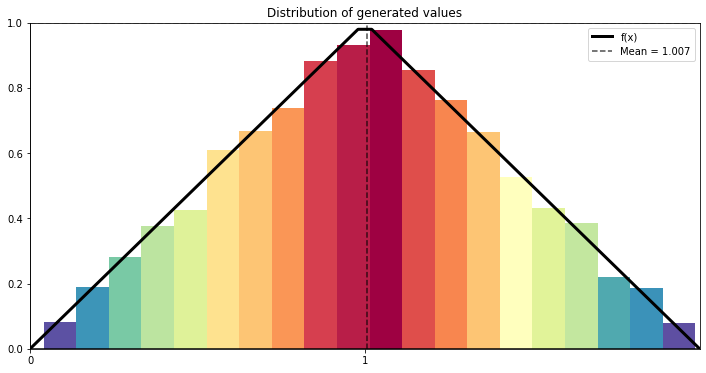

In [46]:
ex8rejgen.plot(10000)

In [7]:
effsum = runTimeCalc(ex8rgen.gen,100)
effit = runTimeCalc(ex8itgen.gen,100)
effrej = runTimeCalc(ex8rejgen.gen,100)

Calculating exectime..........Done
Calculating exectime..........Done
Calculating exectime..........Done


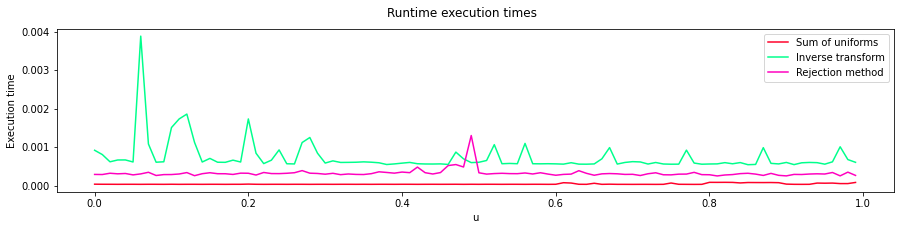

In [8]:
plotExTimes({'Sum of uniforms':effsum,'Inverse transform':effit, 'Rejection method': effrej})

If $0 \le x_{0} < 1$:  
$P(X < x_{0}) = \cfrac{x_{0}^{2}}{2}$  
$0.125 = \cfrac{x_{0}^{2}}{2} \Rightarrow x_{0} = 0.5$

In [9]:
print("Sum of uniforms P(x<0.5)= {} with {} generated values".format(ex8rgen.P(0.5,10000),10000))
print("Sum of uniforms P(x<0.5)= {} with {} generated values".format(ex8itgen.P(0.5,10000),10000))
print("Sum of uniforms P(x<0.5)= {} with {} generated values".format(ex8rejgen.P(0.5,10000),10000))

Sum of uniforms P(x<0.5)= 0.1219 with 10000 generated values
Sum of uniforms P(x<0.5)= 0.1276 with 10000 generated values
Sum of uniforms P(x<0.5)= 0.1249 with 10000 generated values


## Ex 9

Implement 3 different methods to generate a standard normal variable:
- Rejection method as explained in the example 5F in the *Simulation* book by S.M. Ross
- Polar method
- Dividing two uniforms

### Rejection method

As explained in the book, we can't directly generate a normal variable from a exponential support variable because the domain of the normal variable is $\mathbb{R}$ and the domain of an exponential is $\mathbb{Z}$.
Let $Z$ be a standar normal random variable. Note that $|Z|$ has probability density function:
$$f(x) = \cfrac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}} , 0 \le x < \infty$$
  
    
Let 
$$
f_{X}(x) = \cfrac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}} , 0 \le x < \infty
f_{Y}(x) = \mathcal{E}(1) = e^{-x} , 0 \le x < \infty
$$
And  
$$
h(x) = \cfrac{f_{X}(x)}{f_{Y}(y)} = \sqrt{2/\pi}e^{x-x^{2}/2}
$$
The maximum value of $h(x)$ occurs at the value of x that maximixes $x-x^{2}/2$ and that occurs at $x=1$. So we take 
$$
c = Max(\cfrac{f_{X}(x)}{f_{Y}(y)}) = \cfrac{f_{X}(1)}{f_{Y}(1)} = \sqrt{2/e\pi} 
$$
  
  
$$
\cfrac{f_{X}(x)}{cf_{Y}(y)} = e^{x-\frac{x^{2}}{2}-\frac{1}{2}}
$$

So we can generate $|Z|$ as it follows:
``` python
y = exp(1)
u = random()
if u <= np.exp(-((y-1)**2)/2):
    return y
else gotostep1
```

Note that $u \leq e^{-(y-1)^{2}/2} \Leftrightarrow - \log(u) \ge (y-1)^{2}/2$ and we have proven that $-\log(u)$ is an exponential with rate 1 so the algorithm could be generating 2 exponentials.  
Now that we know how to generate $|Z|$, we can obtain $Z$ by returning x or -x with equal probability.


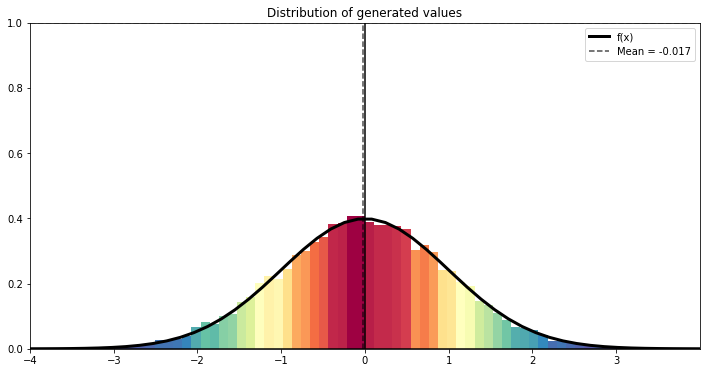

In [4]:
ex9 = Normal(method='r')
ex9.plot(10000,bins=70)

### Polar method  
Let X, Y independent standard normal random variables. Given that they can take values in all $\mathbb{R}$, $(X,Y)$ represents a point in $\mathbb{R}^{2}$.  Let $R$ and $\theta$ represent the polar coordinates of the vector $(X,Y)$.  
Since X and Y are independent, their joint density is the product of their individual densities and is given by:
$$
f_{X,Y}(x,y)=\cfrac{1}{\sqrt{2\pi}}e^{-x^{2}/2}\cfrac{1}{\sqrt{2\pi}}e^{-y^{2}/2} = \cfrac{1}{2\pi}e^{-(x^{2}+y^{2})/2} 
$$
To determine the densities of $R^{2}$ and $\theta$, we make a change of variables as follows:  
First note that $R^{2} = R^{2}(cos^{2}+sin^{2})= R^{2}cos^{2} + R^{2}sin^{2} = X^{2} + Y^{2}$.  
let $d = x^{2}+y^{2}$
$$
f_{R^{2},\theta}(d,\alpha) = \cfrac{1}{2\pi}e^{-\frac{1}{2}d} det(Jacobian) = \cfrac{1}{2\pi}e^{-\frac{1}{2}d}\cfrac{1}{2} 
$$
And we can write this as:  
$$
f_{R^{2},\theta}(d,\alpha) = \cfrac{1}{2\pi} \mathbb{I}_{(0,2\pi)}(\alpha) \cfrac{1}{2}e^{-\frac{1}{2}d} \mathbb{I}_{(0,\infty)}(d)
$$
Note that:
$$
\cfrac{1}{2\pi} \mathbb{I}_{(0,2\pi)}(\alpha) = U(0,2\pi)
$$
$$
\cfrac{1}{2}e^{-\frac{1}{2}d} \mathbb{I}_{(0,\infty)}(d) = \mathcal{E}(1/2)
$$

So the algorithm goes as follows:
```python
def two_normals():
    SquareR = exponential(1/2)
    theta = 2*pi*random()
    x = sqrt(SquareR)*cos(theta)
    y = sqrt(SquareR)*sin(theta)
    return x,y
```


Note that:  
$X = \sqrt{-2\log(U_1)cos(2\pi U_{2})}$  
$Y = \sqrt{-2\log(U_1)sin(2\pi U_{2})}$  
These transformations are called *Box muller Transformations*. One disadvantage of these transformations is that they require calculating 2 trigonometric functions: sin and cos. To improve this step, note that if we generate uniform random numbers in the circle of radius 1 $U_{1}$,$U_{2}$, and $(V_{1},V_{2})$ are the coordinates of a random point in aformentioned circunference, then:
- For each $r, 0<r<1$:  
$$
P(V_{1}+V_{2} \le r) = P(\sqrt{V_{1}+V_{2}} \le \sqrt{r}) = \cfrac{\pi r}{\pi} = r
$$
- For $\alpha, 0\le \alpha \le 2\pi$:
$$
P(0 < arctan\cfrac{V_{2}}{V_{1}} < \alpha) = \cfrac{\alpha / 2}{\pi} = \cfrac{1}{2\pi}\alpha
$$  
  
Meaning that:   
  
$V_{1}^2+V_{2}^2 = S \sim U(0,1)$  
$arctan\cfrac{V_{2}}{V_{1}} = \theta  \sim U(0,2\pi)$

Also, it's relatively easy to see that $S,\theta$ are independent:  
$$
P(S\le r, \theta \le \alpha) = r \cfrac{\alpha}{2\pi}
$$

We also know that for $(X,Y) \sim \theta$:  
$cos\theta = \cfrac{X}{\sqrt{X^{2}+Y^{2}}}$   
$sin\theta = \cfrac{Y}{\sqrt{X^{2}+Y^{2}}}$   
  
Wrapping up:
$cos\theta = \cfrac{V_{1}}{\sqrt{V_{1}^{2}+V_{2}^{2}}} = \cfrac{V_{1}}{\sqrt{S}}$  
$sin\theta = \cfrac{V_{2}}{\sqrt{V_{1}^{2}+V_{2}^{2}}} = \cfrac{V_{2}}{\sqrt{S}}$  



And the algorithm can be written as: 
```python
def box_muller_two_normals():
    # These points are in the 1x1 square
    v1,v2 = 2 *random() -1, 2 *random() -1
    # If the points are not in the unit circle, keep generating
    while v1**2 + v2**2 > 2:
        S = v1**2 + v2**2
        X = v1 * sqrt(-2 * log(S) / S)
        Y = v2 * sqrt(-2 * log(S) / S)
    return X,Y
```


In [5]:
ex9polar = NormalPolar()


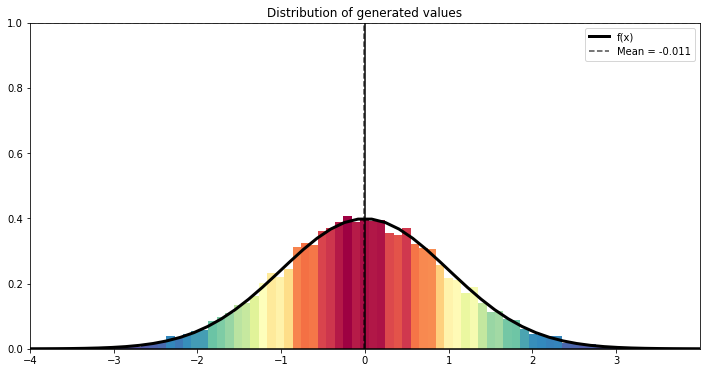

In [6]:
ex9polar.plot(10000,bins=70)

In [7]:
## Uniform quotient method



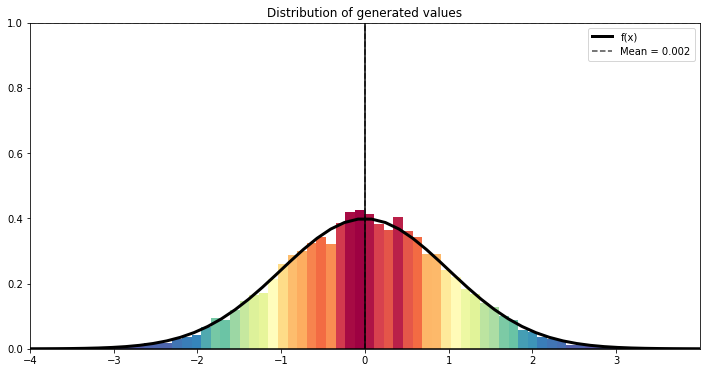

In [8]:
ex9q = Normal(method='q')
ex9q.plot(10000,bins=70)

## Ex 10

Let $(X,Y)$ an uniformely distributed point in a circle of radius 1. Proof that if $R$ is the distance of the point $(X,Y)$ to the center of the circle, then $R^{2}$ is uniformely distributed in $(0,1)$

*Proof*

Let $D$ be a dial centered in $(a,b)$ with radius 1:  
$D = \{(x,y) \in \mathbb{R}: \sqrt{(x-a)^{2}+(y-b^{2})} \le 1\}$  
Because $(X,Y)$ is uniformely distributed on D, $P((X,Y) \in D) = 1$  
Let D_{r} be the dial of radius $r$ centered in $(a,b)$:  
$D_{r} = \{(x,y) \in \mathbb{R}: \sqrt{(x-a)^{2}+(y-b^{2})} \le r\}$  
Then $P((X,Y) \in D_{r}) = \cfrac{Area r}{Area D} = \cfrac{2\pi r^{2}}{2\pi} = r^{2}$

Let $R^{2} = (x-a)^{2}+(y-b)^{2}$, clearly $R$ is the distance of $(x,y)$ to the center.  
We want to se how $R$ is distributed, so we will see its cumulative distribution.
- If $0 < z \le 1$:  
$F_{R^{2}}(z) = P(R^{2} \le z) = P((X-a)^{2} + (Y-b)^{2} \le z) = P(\sqrt{(X-a)^{2} + (Y-b)^{2}} \le \sqrt{z}) = P((X,Y) \in D_{\sqrt{z}}) = z$  

- If $z \le 0$:  
$F_{R^{2}}(z) = P(R^{2} \le z) = P(\varnothing) = 0$

- If $z > 1$:  
$F_{R^{2}}(z) = P(R^{2} \le z) = P(R^{2} \le 1) = P((X,Y) \in D) = 1$  
    
Then:

$$
F_{R^{2}}(z)= \left\{ \begin{array}{ll}
             0 & if &  z \le 0 \\
             \\ z & if &  0 < z \le 1 \\
             \\ 1 & otherwise\\ 
             \end{array}
   \right.
$$
  
Which is a uniform distribution in $(0,1)$


## Ex 11

A random variable $X$ is Cauchy distributed with parameter $\lambda > 0$ if:  
$$
f(x) = \cfrac{1}{\lambda \pi(1+(x/\lambda)^{2})}, x\in \mathbb{R}
$$
a) Implement the uniform quotient method to simulate X with $\lambda=1$. For this:
- prove that $C_{f} = \{(u,v)| 0 < u < \sqrt{f(u/v)} \}$ is the cemicircle centered in $(0,0)$ of radius $\sqrt{1/\pi}$  
- develop an algorithm CAUCHY() that generates pairs (U,V) uniformely distributed in $C_{f}$ and returns $X = V/U$, is it necessary to use $\pi$?  

b) Prove that if you have a variable $X$ Cauchy distributed with $\lambda = 1$, then $X\lambda$ has Cauchy distribution with parameter $\lambda$  

c) Implement CAUCHY(lambda)

#### a  
If $(u,v) \in C_{f}$:  
$$
0 < u < \sqrt(f(u/v)) = \cfrac{1}{\pi (1+((\frac{u}{v})^2)} = \cfrac{u^{2}}{\pi(u^{2}+v^{2})}  
$$  
if and only if
$$
\pi(u^{2}+v^{2}) > 1, u > 0 
$$  
if and only if
$$
\sqrt{u^{2}+v^{2}} < \sqrt{\cfrac{1}{\pi}}
$$  
So $(u,v)$ is at most at $\sqrt{\frac{1}{\pi}}$ from the center $(0,0)$ and $u > 0$ which means that $(u,v)$ is in the right semicircle centered in $(0,0)$

Note that it is not necessary to use the value of $\pi$.
Let U,V random uniforms $\sim U(0,1)$. We would have to check that:
$
\sqrt{\cfrac{u}{\sqrt{\pi}}^{2}+\cfrac{-2v+1}{\sqrt{\pi}}^{2}} < \sqrt{\cfrac{1}{\pi}}
$

Simplifying, the condition we have to check to assure that a pair $(u,v) \in C_{f}$:  
$
u^{2} + (-2v+1)^{2} < 1
$


In [2]:
cauchy = Cauchy(x_lim=(-10,10))

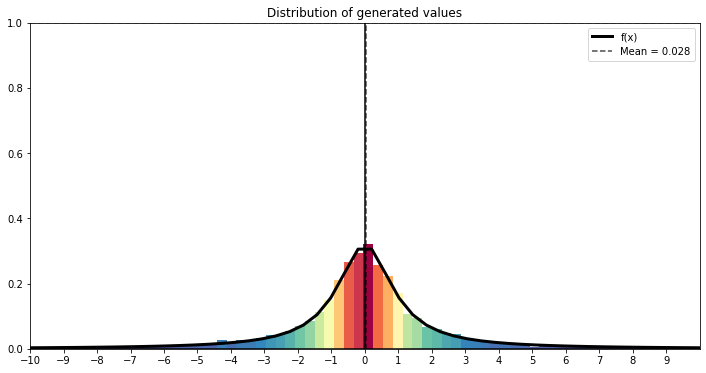

In [3]:
cauchy.plot(10000,bins=400)

## Ex 12


Let $X$ a random variable Cauchy distributed.   
a) Calculate X cumulative distribution function.  
b) Simulate X applying inverse transform method.  
c) State if it is possible to generate X using rejection method, rejecting with a normal variable


### a
$$
f(x) = \cfrac{1}{\pi(1+(x)^{2})}, x\in \mathbb{R}
$$
$$
F(a) = P(x \le a) = \int_{-\infty}^a f(s)ds = \cfrac{arctan(a)}{\pi} + \cfrac{1}{2}
$$
$$
F^{-1}(a) = tan[\pi(a-\frac{1}{2})]
$$

### b

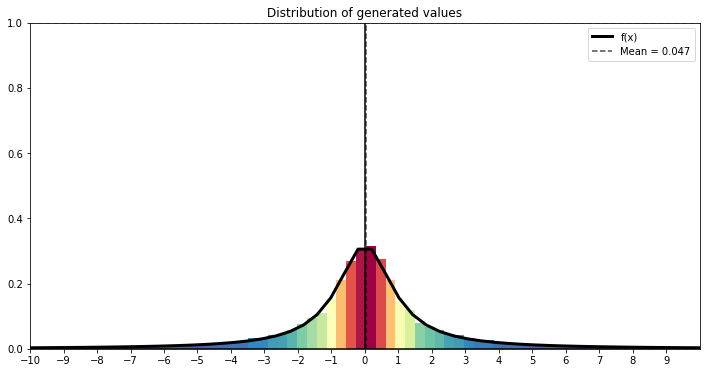

In [8]:
cauchyIT = Cauchy(method='it',x_lim=(-10,10))
cauchyIT.plot(10000,bins=400)

### c

To be able to generate a random variable distributed $f(x)$ via rejection method, we need to assure that there exists a constant $c$ and a function $g(x)$ such that
$$\cfrac{f(x)}{g(x)} \le c$$
$$f(x) = \cfrac{1}{\pi(1+(x)^{2})}$$
$$g(x) = \cfrac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}}$$

$$h(x) = \cfrac{f(x)}{g(x)} = \cfrac{e^{\frac{-x^{2}}{2}}\sqrt{2\pi}}{\pi(1+(x)^{2})}$$
$$\lim_{x \to \pm \infty}(h(x)) = \lim_{x \to \pm \infty}(\cfrac{e^{\frac{x^{2}}{2}}\sqrt{2\pi}}{\pi(1+(x)^{2})}) = \infty $$ *Note that the limit is between a exponential and a polynomial, so it does not converge*  
So no, it is NOT possible to do that

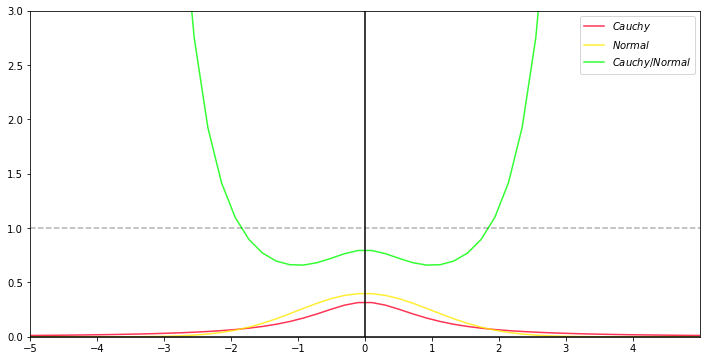

In [5]:
labels = [
    r'$ Cauchy$',
    r'$ Normal$',
    r'$ Cauchy/Normal$'
          ]
x_lim = (-5,5)
y_lim = (0,3)
cauchypdf = Cauchy().pdf[0]
normalpdf = Normal().pdf[0]
fs = [cauchypdf, normalpdf ,lambda x: cauchypdf(x)/normalpdf(x)]
plot(fs,x_lim,y_lim,labels,dist=False,ls='-')

## Ex 13

In [2]:
pp = PoissonProcess(1,20)
T = 20
pp.plot()

In [3]:
len(data)

18

We also know that the events ocured before time t, are poisson distributed with parameter $t\lambda$ so we can also check that.

In [7]:
values = pp.gen()

In [8]:
from collections import Counter
import numpy as np
from scipy.stats import poisson
counter = Counter((int(x) for x in values))
counts = [counter[i] if i in counter else 0 for i in range(T)]
counts

[1, 2, 0, 0, 2, 1, 2, 2, 0, 1, 3, 0, 0, 2, 0, 2, 1, 1, 1, 6]

In [15]:
process = np.cumsum(counts)
p = [poisson.pmf(i,i) for i in range(T)]

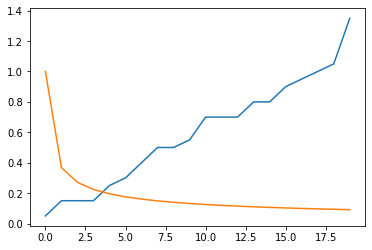

In [17]:
plt.plot(process/len(process))
plt.plot(p)


## Ex 14

In [12]:
from random import randint
def ex14Simulation(T):
    nBuses = len(PoissonProcess(5,T).gen())
    busCapacity = lambda: randint(20,40)
    arrivalCount = sum(busCapacity() for _ in range(nBuses))
    return arrivalCount
    

In [18]:
ex14Simulation(1)

290

## Ex 15

Write a program that uses the shrinking algorithm to generate the number of events and the first units of time of a non-homogeneous Poisson Process with the following intensity functions:  

a) $\lambda(t) = 3+\cfrac{4}{t+1}, 0 \le t \le 3$  
b) $\lambda(t) = (t-2)^{2}-5t+17, 0 \le t \le 5$  
c) $\lambda(t) = \left\{ \begin{array}{ll}
             \cfrac{t}{2}-1 & if & 2 \leq x \leq 3 \\
             \\ 1-\cfrac{t}{6} & if & 3 \leq x \leq 6 \\
             \\ 0 & otherwise
             \end{array}
   \right.
$



### a  


$\lambda(t) = 3+\cfrac{4}{t+1}, 0 \le t \le 3$
Tomamos $\lambda$ tal que $\lambda(t) \le \lambda \forall t$  

Como $\lambda(t)$ es decreciente, tomamos $\lambda = \lambda(0) = 7$ y el algoritmo es como se sigue:

```python
def Poisson_no_homogeneo(T):
    'Devuelve el n ́umero de eventos NT y los tiempos en Eventos'
    'lamda_t(t): intensidad, lamda_t(t)<=lamda'
    NT = 0
    Eventos = []
    t = -log(1 - random()) / 7
    while t <= T:
        V = random()
        if V < 3+4/(t+1)(t) / lamda:
            NT += 1
            Eventos.append(t)
        t+=-log(1 - random()) / 7
    return NT, Eventos
```

### b)

b) $\lambda(t) = (t-2)^{2}-5t+17, 0 \le t \le 5$  

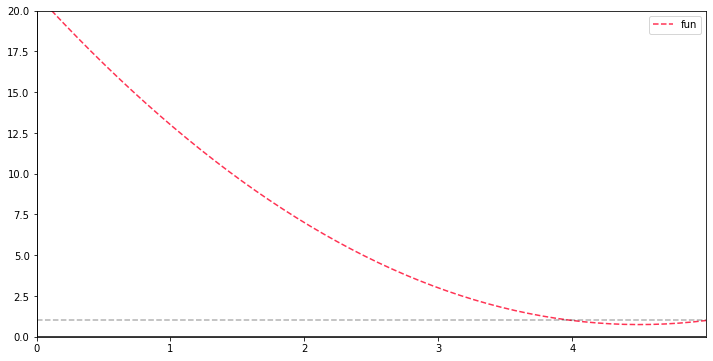

In [9]:
f = [lambda t:(t-2)**2-5*t+17]
plot(f,x_lim=(0,5),y_lim=(0,20),labels=['fun'],dist=False)

Tomamos $\lambda = \lambda(0) = 21 $

In [10]:
f[0](0)

21